## Imports

In [1]:
import time

import energyflow as ef
import energyflow.emd
import energyflow.datasets.mod

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import modplot
import utils

## EMD Options

In [2]:
save = True
num4emd_str = '40k'

ptranges = [(399, 401), (540, 560)]
dsets = ['cms', 'sim', 'gen']
names = [
    'CMS_Jet300_pT{}-{}GeV_EtaMax19_Quality2_{}',
    'SIM_Jet300_pT{}-{}GeV_EtaMax19_Quality2_{}',
    'GEN_pT{}-{}GeV_EtaMax19_{}',
]

rotations = [True, False]
filters = {
    'All': {'which': 'all', 'pt_cut': None, 'chs': True},
    'PFCpTCut': {'which': 'all', 'pt_cut': 1.0, 'chs': True},
    'Tracks': {'which': 'charged', 'pt_cut': None, 'chs': True},
    'TracksPFCpTCut': {'which': 'charged', 'pt_cut': 1.0, 'chs': True},
}

## CMS/SIM/GEN Comparison Plots

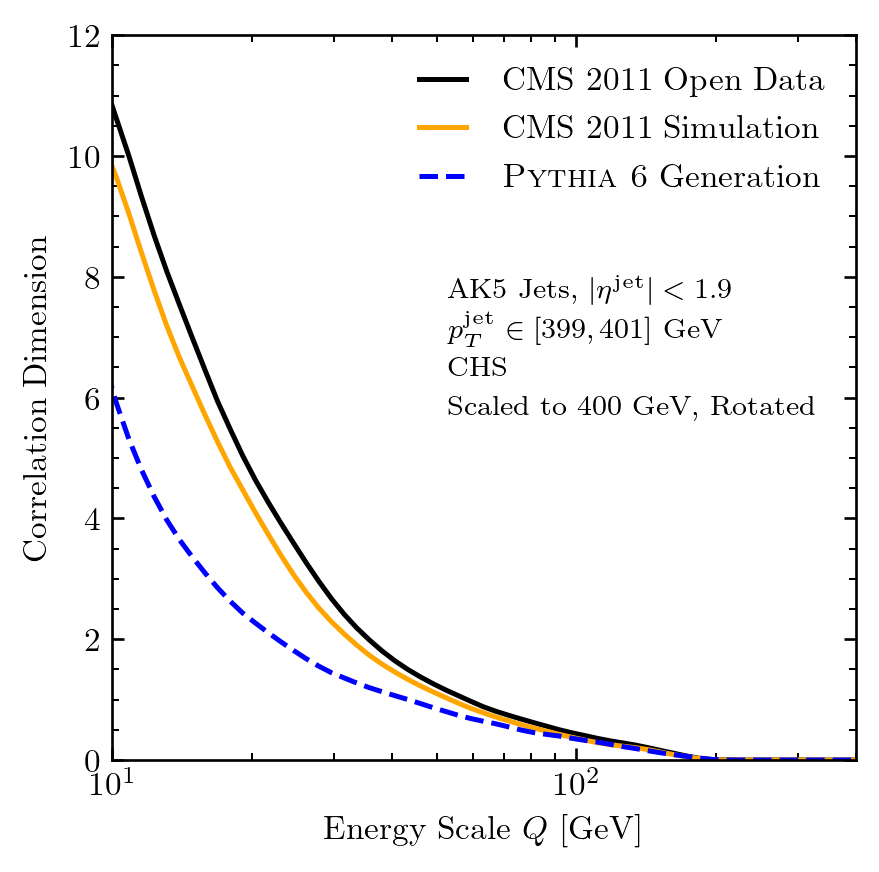

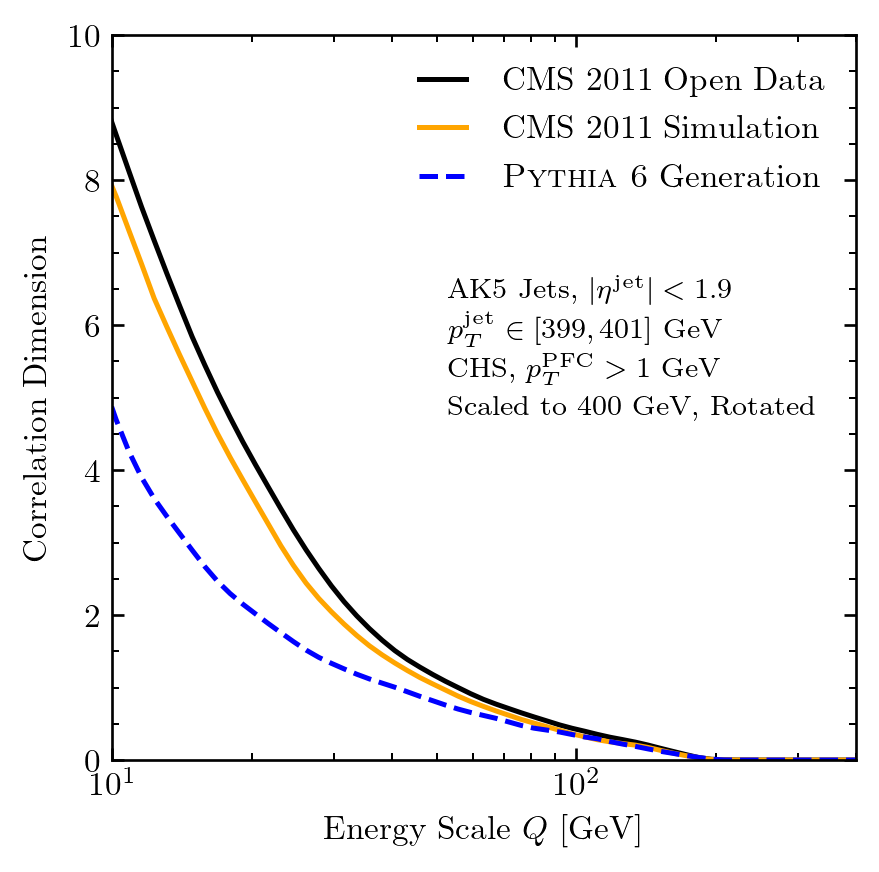

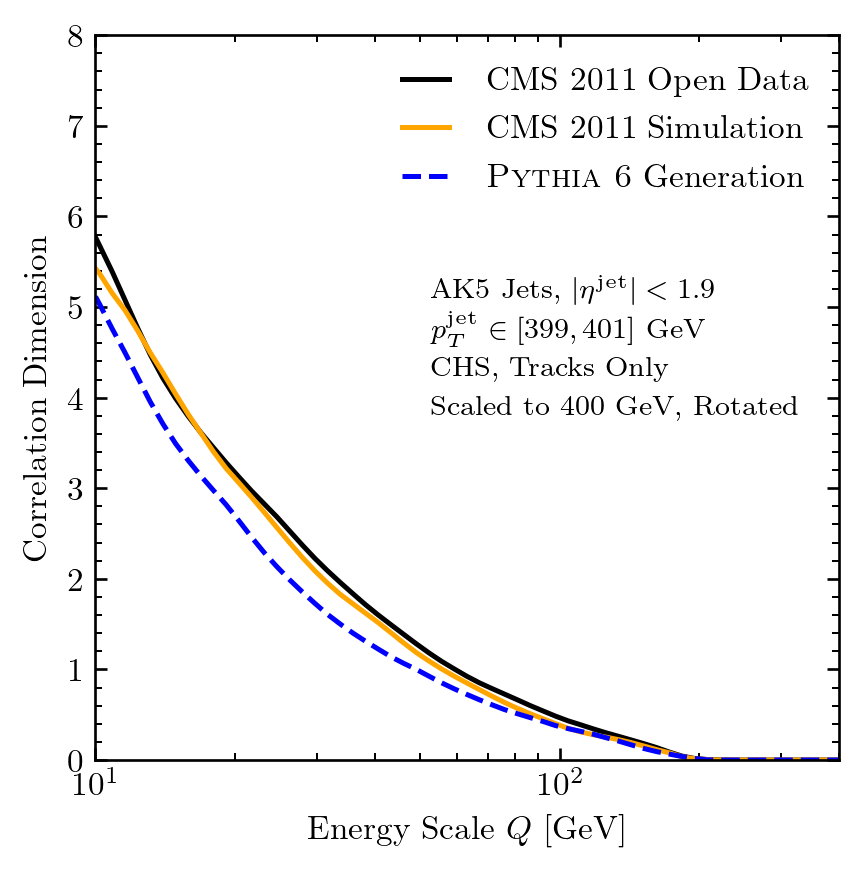

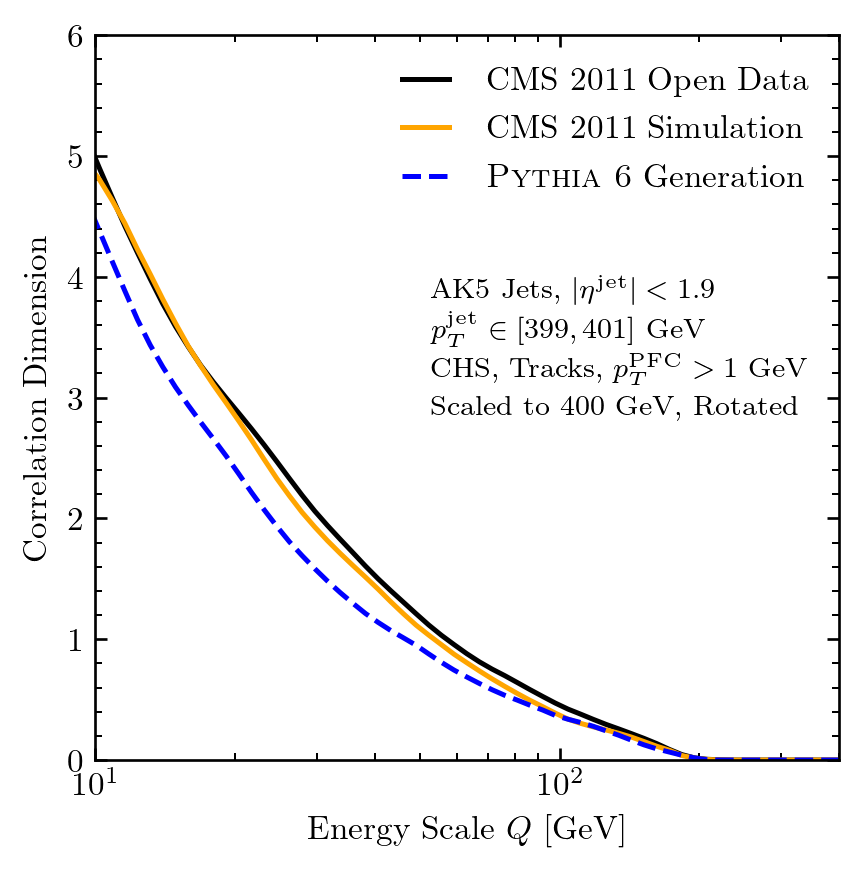

In [11]:
ptmin, ptmax = (399, 401)
ymaxs = {'All': 12, 'PFCpTCut': 10, 'Tracks': 8, 'TracksPFCpTCut': 6}

filtstamps = {
    'All': 'CHS',
    'PFCpTCut': r'CHS, $p_T^{\mathrm{PFC}}>1$ GeV',
    'Tracks': 'CHS, Tracks Only',
    'TracksPFCpTCut': r'CHS, Tracks, $p_T^{\mathrm{PFC}}>1$ GeV',
}

for rotate in rotations[:1]:
    rot_str = '_Rotated' if rotate else ''
    
    for j,filtname in enumerate(filters):

        dims_list, midbins2_list, dims_errs = [], [], []
        for dset,name in zip(dsets, names):
            dset_path = (dset if dset != 'gen' else 'sim')
            name = name.format(ptmin, ptmax, num4emd_str)
            cd_name = 'EMDCorrDims_{}_{}{}.npz'.format(name, filtname, rot_str)

            f = np.load(utils.path(dset_path, 'plotdata', cd_name))
            dims_list.append(f['dims'])
            midbins2_list.append(f['midbins2'])
            dims_errs.append(f['dims_errs'])
            f.close()

        styles = [modplot.cms_style(func='plot'), modplot.sim_style(func='plot'), modplot.gen_style()]

        # plot the correlation dimensions
        fig, [ax] = modplot.axes(ratio_plot=False, xlim=(10, 400), ylim=(0, ymaxs[filtname]),
                                 xlabel=r'Energy Scale $Q$ [GeV]', ylabel='Correlation Dimension')

        # log x scale
        ax.set_xscale('log')

        for i,(dims, midbins2, style, errs) in enumerate(zip(dims_list, midbins2_list, styles, dims_errs)):
            #ax.fill_between(midbins2, dims - errs, dims + errs, color=style['color'], alpha=0.25)
            ax.plot(midbins2, dims, **style)

        # labels
        modplot.legend(ax=ax)
        modplot.stamp(0.45, 0.65, ax=ax, delta_y=0.055,
                      line_0=r'AK5 Jets, $|\eta^{\rm jet}|<1.9$',
                      line_1=r'$p_T^{\rm jet}\in[399,401]$ GeV',
                      line_2=filtstamps[filtname], 
                      line_3='Scaled to 400 GeV' + ', Rotated' if rotate else '')

        # save plot
        if save:
            tx = 27.75 if ymaxs[filtname] < 10 else 32.5
            plot_name = 'EMDCorrDim_pT{}-{}GeV_{}{}'.format(ptmin, ptmax, filtname, rot_str)
            modplot.save(fig, plot_name, tx=tx, ty=252, out_plots_dir='../plots/CorrDims/')

        fig.show()

## Filter Comparison Plots

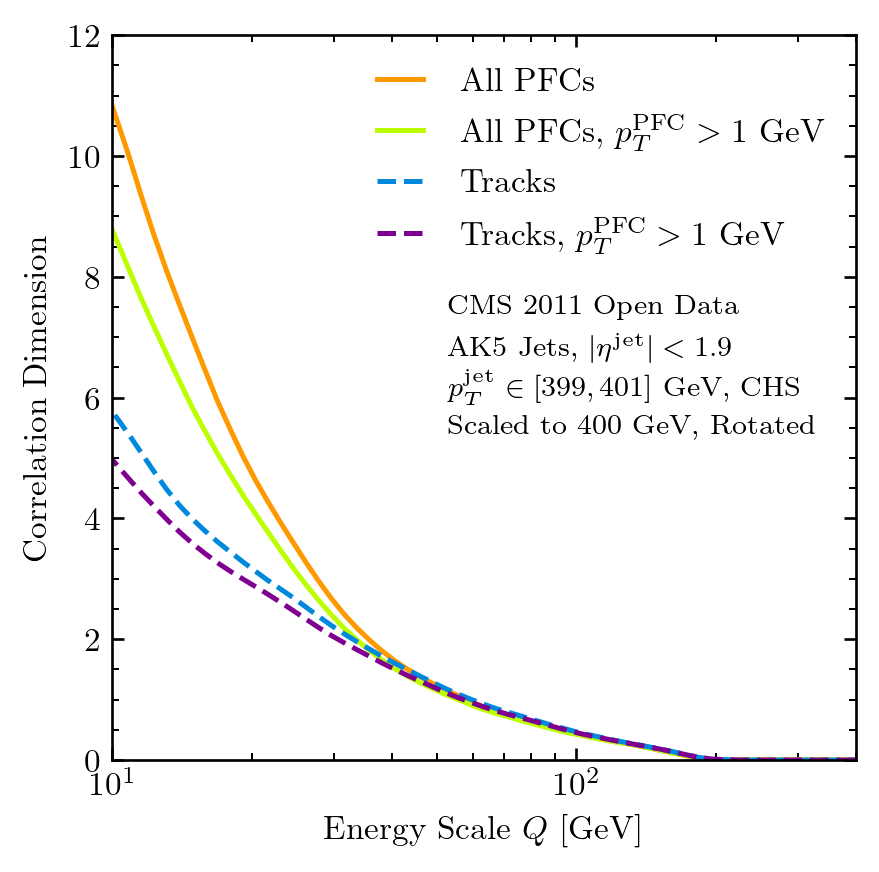

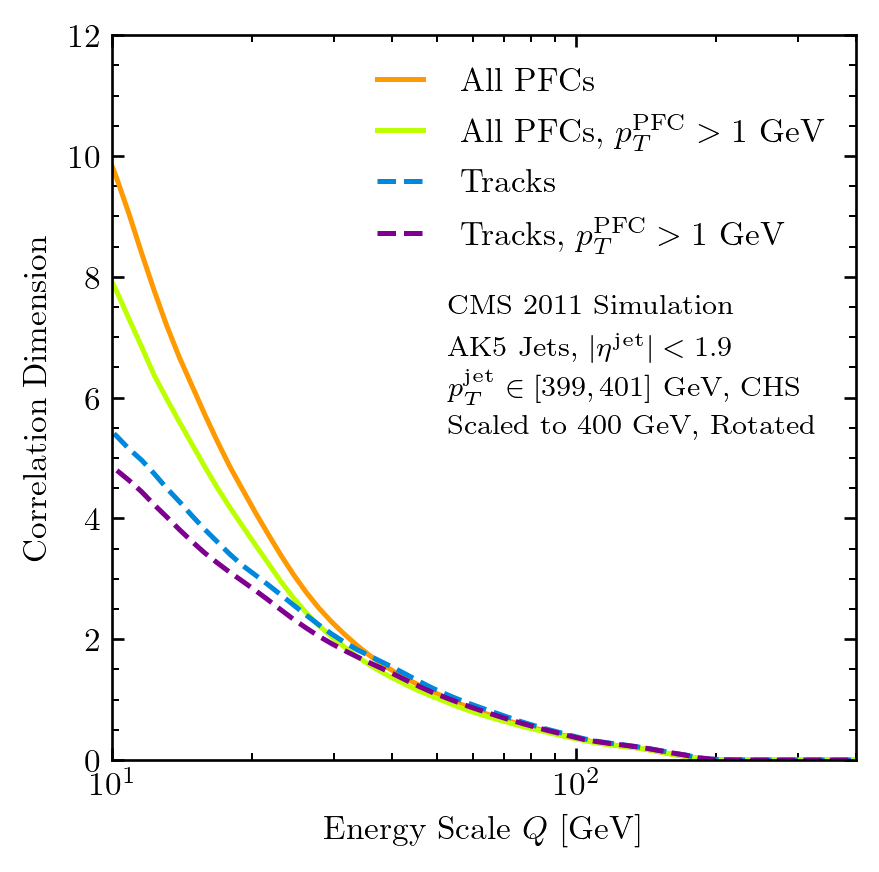

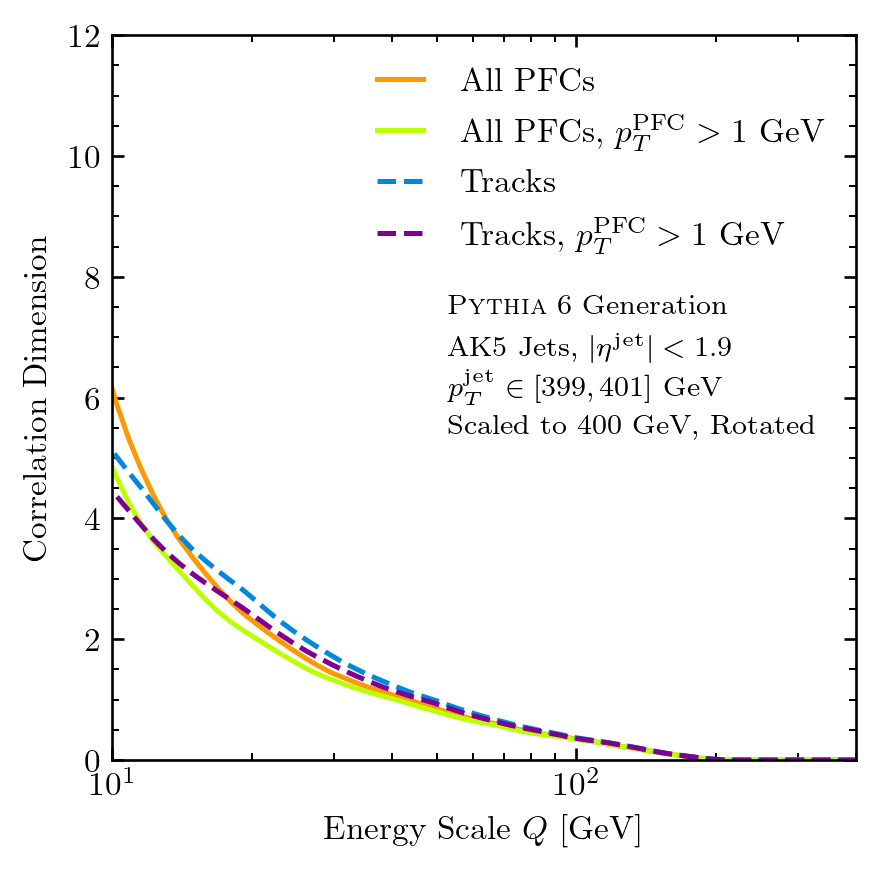

In [12]:
ptmin, ptmax = (399, 401)

cmap = matplotlib.cm.get_cmap('nipy_spectral')
colors = {
    'All': cmap(0.8),
    'PFCpTCut': cmap(0.65),
    'Tracks': cmap(0.275),
    'TracksPFCpTCut': cmap(0.075),
}

lss = {
    'All':'-', 
    'PFCpTCut':'-',
    'Tracks':'--',
    'TracksPFCpTCut':'--'
}

dsetstamps = {
    'cms': 'CMS 2011 Open Data',
    'sim': 'CMS 2011 Simulation',
    'gen': r'\textsc{Pythia} 6 Generation',
}

filtstamps = {
    'All': 'All PFCs',
    'PFCpTCut': r'All PFCs, $p_T^{\mathrm{PFC}}>1$ GeV',
    'Tracks': 'Tracks',
    'TracksPFCpTCut': r'Tracks, $p_T^{\mathrm{PFC}}>1$ GeV',
}


for rotate in rotations[:1]:
    rot_str = '_Rotated' if rotate else ''
    
    for j,(dset,name) in enumerate(zip(dsets, names)):
        dset_path = (dset if dset != 'gen' else 'sim')
        style = eval("modplot.{}_style(func='plot', ls='-')".format(dset))

        dims_list, midbins2_list, dims_errs = [], [], []
        for filtname in filters:
            name = name.format(ptmin, ptmax, num4emd_str)
            cd_name = 'EMDCorrDims_{}_{}{}.npz'.format(name, filtname, rot_str)

            f = np.load(utils.path(dset_path, 'plotdata', cd_name))
            dims_list.append(f['dims'])
            midbins2_list.append(f['midbins2'])
            dims_errs.append(f['dims_errs'])
            f.close()

        # plot the correlation dimensions
        fig, [ax] = modplot.axes(ratio_plot=False, xlim=(10, 400), ylim=(0, 12),
                                 xlabel=r'Energy Scale $Q$ [GeV]', ylabel='Correlation Dimension')

        # log x scale
        ax.set_xscale('log')

        for i,(dims, midbins2, filtname, errs) in enumerate(zip(dims_list, midbins2_list, filters, dims_errs)):
            style.update({'color': colors[filtname], 'label': filtstamps[filtname], 'ls':lss[filtname]})
            #ax.fill_between(midbins2, dims - errs, dims + errs, color=style['color'], alpha=0.25)
            ax.plot(midbins2, dims, **style)

        # labels
        modplot.legend(ax=ax)
        modplot.stamp(0.45, 0.625, ax=ax, delta_y=0.055,
                      line_0=dsetstamps[dset],
                      line_1=r'AK5 Jets, $|\eta^{\rm jet}|<1.9$',
                      line_2=r'$p_T^{\rm jet}\in[399,401]$ GeV' + (', CHS' if dset != 'gen' else ''),
                      line_3='Scaled to 400 GeV' + ', Rotated' if rotate else '')

        # save plot
        if save:
            plot_name = 'EMDCorrDim_pT{}-{}GeV_{}{}'.format(ptmin, ptmax, dset.upper(), rot_str)
            modplot.save(fig, plot_name, tx=32.5, ty=252, out_plots_dir='../plots/CorrDims/')

        fig.show()

## SIM Quark/Gluon Correlation Dimension

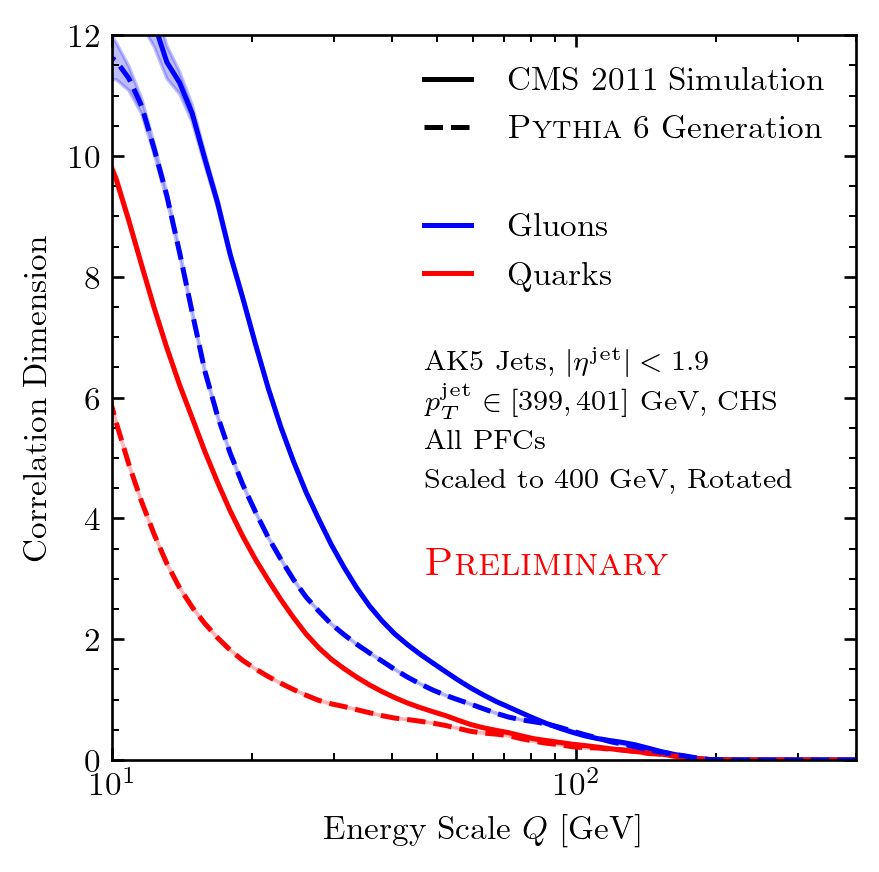

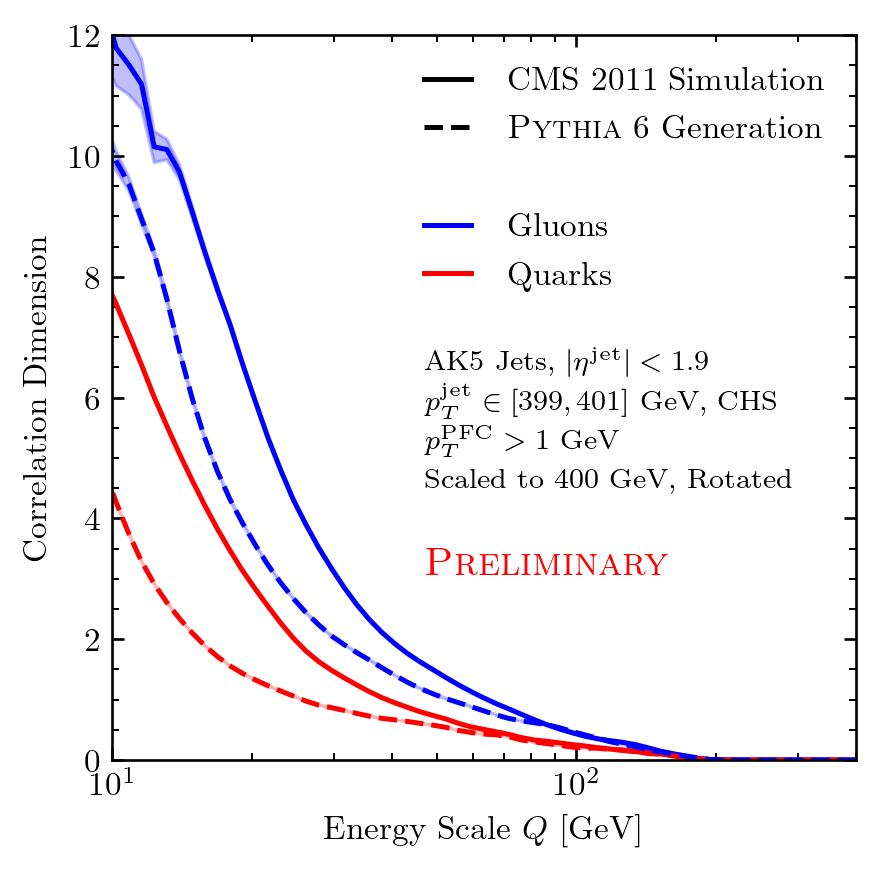

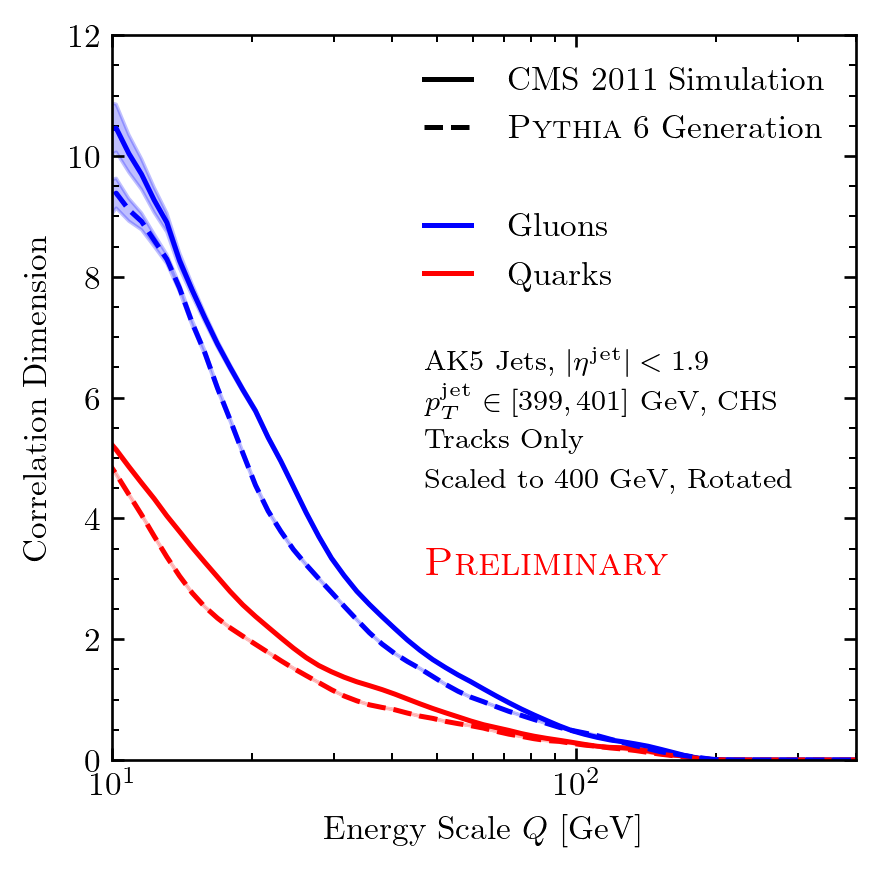

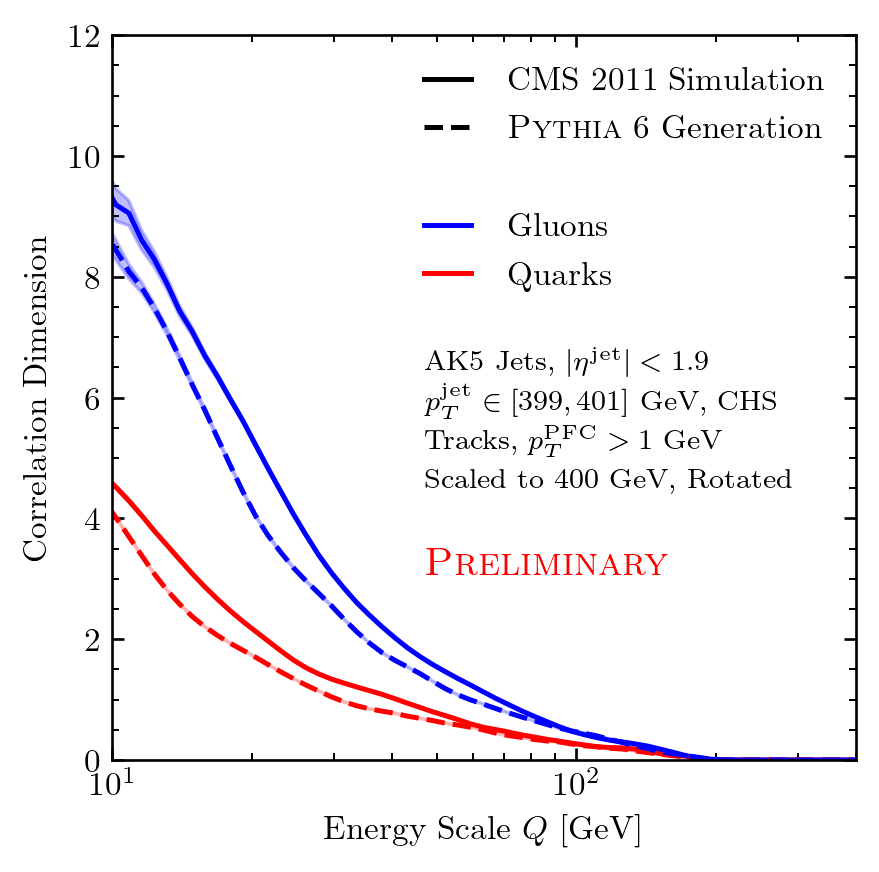

In [20]:
ptmin, ptmax = (399, 401)

colors = {'q': 'red', 'g': 'blue'}

dsetstamps = {
    'cms': 'CMS 2011 Open Data',
    'sim': 'CMS 2011 Simulation',
    'gen': r'\textsc{Pythia} 6 Generation',
}

filtstamps = {
    'All': 'All PFCs',
    'PFCpTCut': r'$p_T^{\mathrm{PFC}}>1$ GeV',
    'Tracks': 'Tracks Only',
    'TracksPFCpTCut': r'Tracks, $p_T^{\mathrm{PFC}}>1$ GeV',
}

rotate = True
rot_str = '_Rotated' if rotate else ''

for filtname in filters:

    dims, errs = {}, {}
    for j,(dset,name) in enumerate(zip(dsets, names)):
        if dset == 'cms':
            continue

        name = name.format(ptmin, ptmax, num4emd_str)
        cd_name = 'EMDCorrDimsQG_{}_{}{}.npz'.format(name, filtname, rot_str)

        f = np.load(utils.path('sim', 'plotdata', cd_name))
        dims[dset+'_qdims'] = f['qdims']
        dims[dset+'_gdims'] = f['gdims']
        errs[dset+'_qerrs'] = f['qerrs']
        errs[dset+'_gerrs'] = f['gerrs']
        midbins2 = f['midbins2']
        f.close()

    # plot the correlation dimensions
    fig, [ax] = modplot.axes(ratio_plot=False, xlim=(10, 400), ylim=(0, 12),
                             xlabel=r'Energy Scale $Q$ [GeV]', ylabel='Correlation Dimension')

    # log x scale
    ax.set_xscale('log')

    for dset in dsets:
        if dset == 'cms':
            continue

        style = eval("modplot.{}_style(func='plot')".format(dset))
        del style['label']

        for p in ['q', 'g']:
            dims_p = dims[dset + '_' + p + 'dims']
            errs_p = errs[dset + '_' + p + 'errs']

            style.update({'color': colors[p]})
            ax.fill_between(midbins2, dims_p - errs_p, dims_p + errs_p, color=style['color'], alpha=0.25)
            ax.plot(midbins2, dims_p, **style)

    plt.plot([], '-', color='black', label='CMS 2011 Simulation')
    plt.plot([], '--', color='black', label=r'\textsc{Pythia} 6 Generation')
    plt.plot([], color='white', label=' ')
    plt.plot([], '-', color=colors['g'], label='Gluons')
    plt.plot([], '-', color=colors['q'], label='Quarks')

    # labels
    modplot.legend(ax=ax)
    modplot.stamp(0.42, 0.55, ax=ax, delta_y=0.055,
                  line_0=r'AK5 Jets, $|\eta^{\rm jet}|<1.9$',
                  line_1=r'$p_T^{\rm jet}\in[399,401]$ GeV, CHS',
                  line_2=filtstamps[filtname],
                  line_3='Scaled to 400 GeV' + rot_str.replace('_', ', '))
    
    modplot.stamp(0.42, 0.27, ax=ax, line_0=r'\textsc{Preliminary}', 
                  textops_update={'color': 'red', 'fontsize': 12})

    # save plot
    if save and 0:
        plot_name = 'EMDCorrDimQG_pT{}-{}GeV_{}{}'.format(ptmin, ptmax, filtname, rot_str)
        modplot.save(fig, plot_name, tx=32.5, ty=252, out_plots_dir='../plots/CorrDims/')

    fig.show()